In [1]:
%matplotlib inline

# Importing some tools for loading data and plotting
import matplotlib.pyplot as plt   # plotting tools
import numpy as np                # numpy for math on arrays
import pandas as pd    # pandas gives us DataFrames
import seaborn as sns  # seaborn helps us plot more easily

# This is the clustering algorithm we will try to understand
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
# Step 1: load the data. It is formatted in "comma-separated values" format, or "csv"
wine_df = pd.read_csv('wine_data_clubes.csv')

# Step 2: let's take a look at the beginning of the data.
wine_df.head()

,class,alcohol,malic,ash,mg,hue,od_ratio,proline
0,1,14.23,1.71,2.43,127,1.04,3.92,1065
1,1,13.20,1.78,2.14,100,1.05,3.40,1050
2,1,13.16,2.36,2.67,101,1.03,3.17,1185
3,1,14.37,1.95,2.50,113,0.86,3.45,1480
4,1,13.24,2.59,2.87,118,1.04,2.93,735


/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


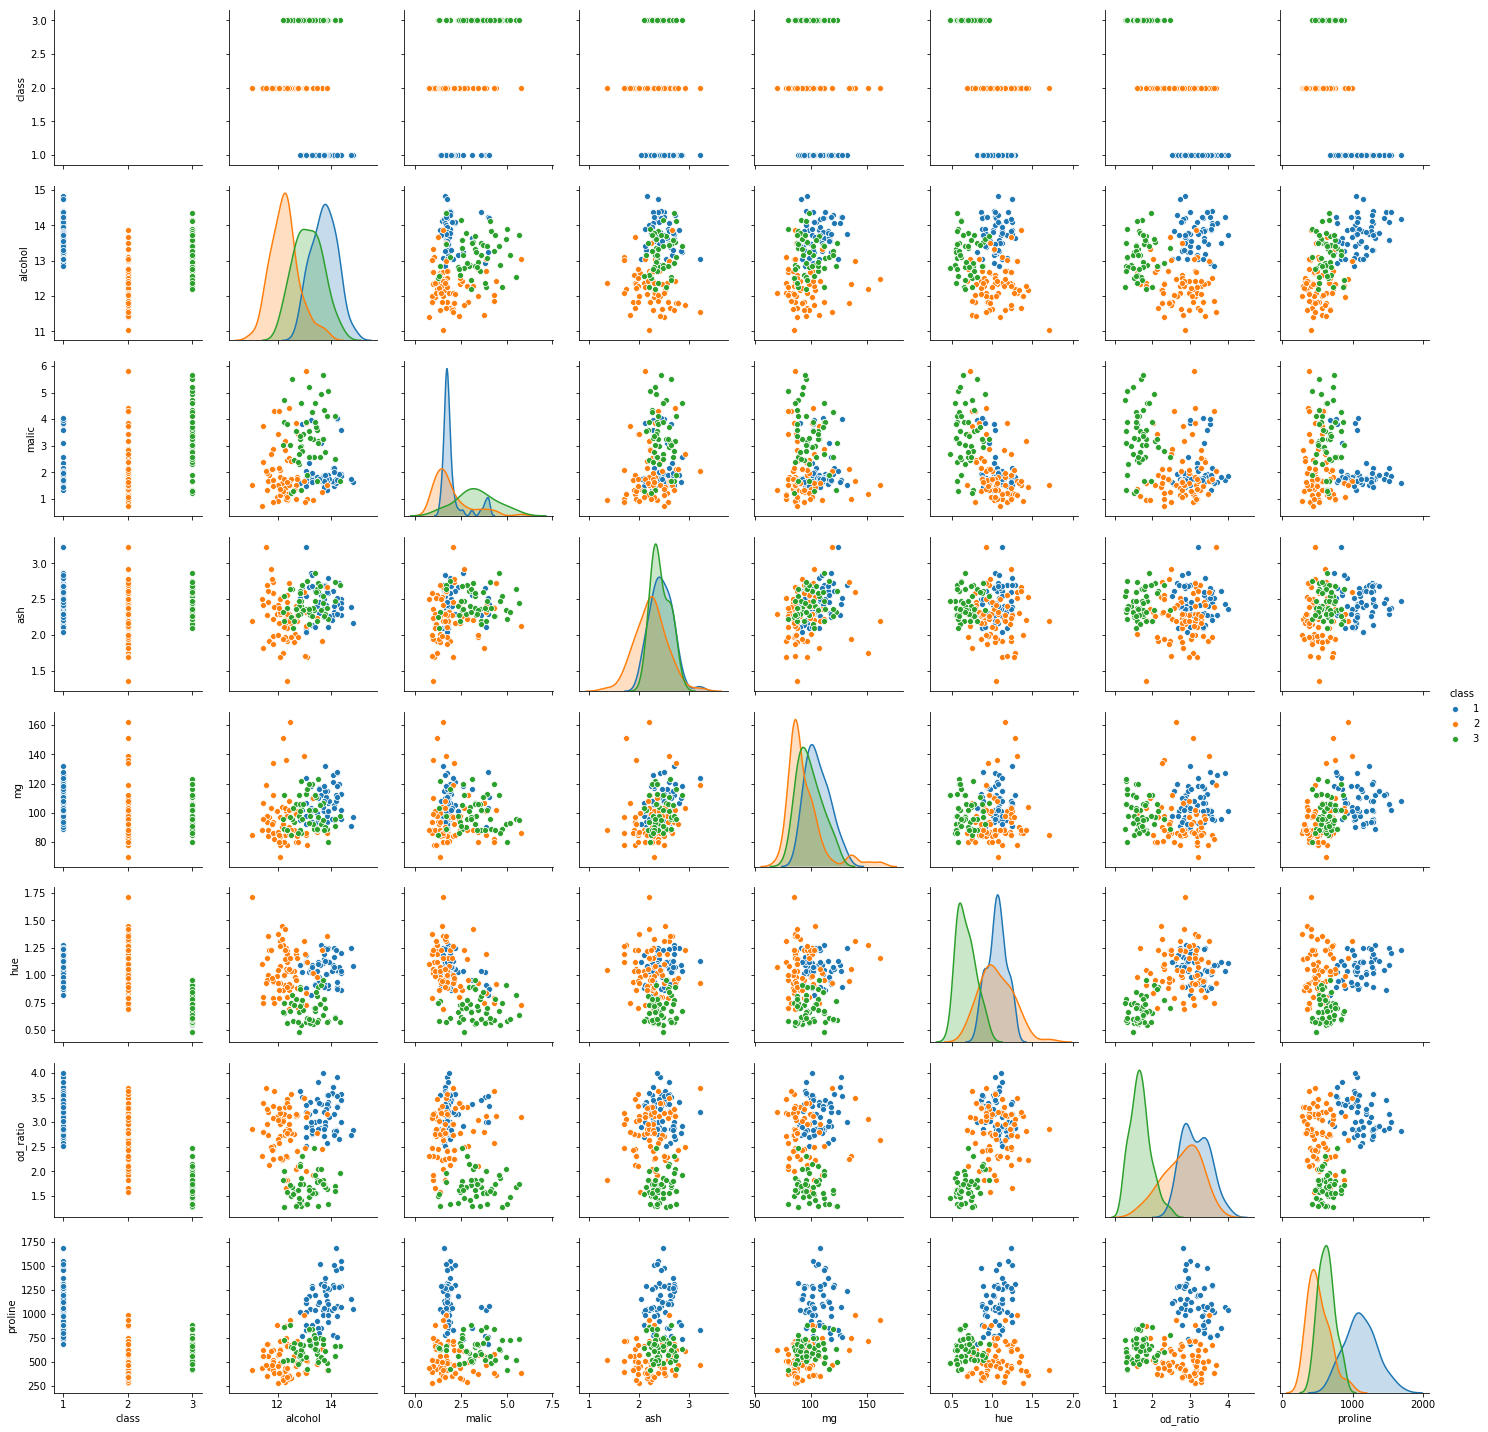

In [3]:
# Seaborn has a nice tool for looking at all pairs of data about the wine.
sns.pairplot(wine_df,       # looking at the wine data
             hue='class',   # color by 'class' column
             )

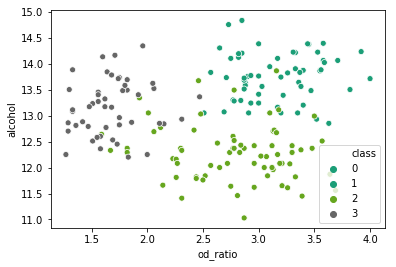

In [4]:
# We noticed above that the wines are pretty well separated by two variables: od_ratio and alcohol.
# od_ratio has someting to do with the color and darkness of the wine
# alcohol is the alcohol content of the wine in % terms 
# Let's take a look at a 2D plot of these data. 

sns.scatterplot(data=wine_df, x='od_ratio', y='alcohol', # scatter of alcohol vs od_ratio
                hue='class',      # color by which wine it is.
                palette='Dark2')  # use darker colors to make it easier to see. 

In [5]:
# So our goal here is to guess which kind of wine we are talking about based on these two properties alone. 
# How would you go about this? Imagine you want to program a computer to win a wine-tasting competition. 

# One strategy is to find groups of "close" points in the 2D plot above. 
# The KMeans algorithm does this. Let's run it and try to figure it out. 

# First - we only want KMeans to look at the od_ratio and alcohol variables
cols = ['od_ratio', 'alcohol']
wine_clusters = wine_df[cols].copy()

# We know that there are 3 groups. 
kmeans = KMeans(n_clusters=3)

# We ask KMeans to "fit" the data that we have, i.e. learn from it. 
kmeans.fit(wine_clusters)
# Now we ask KMeans to predict clusters that same data
clusters = kmeans.predict(wine_clusters)

# Let's save the clusters and have a look
wine_clusters['cluster'] = clusters
wine_clusters.head()

,od_ratio,alcohol,cluster
0,3.92,14.23,1
1,3.40,13.20,1
2,3.17,13.16,1
3,3.45,14.37,1
4,2.93,13.24,1


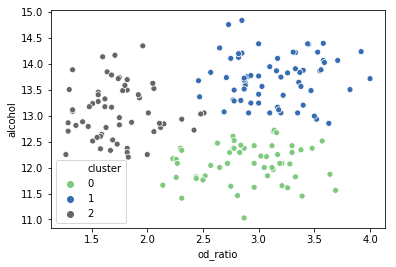

In [6]:
# Plot the data according to the clusters. 
sns.scatterplot(data=wine_clusters, x='od_ratio', y='alcohol', hue='cluster', palette='Accent')

In [7]:
# So that looks pretty good! 
# Two questions: 
# 1. how does the algorithm work?
# 2. how do we evaluate how good it is? 

# Let's start with evaluating how good the clusters are. 
# The question we care about is this: how accurate are our clusters? 
# Since we know the "right" answer in this case, we just ask: what fraction of our assignments are correct? 
# What we are really asking is this: are the same wines in the same clusters in the predicted and real data? 

# Let's look at the clusters by making a single data frame with both true and predicted values. 
true_pred_class_df = pd.DataFrame([wine_df['class'], wine_clusters['cluster']]).T
#print(true_pred_class_df[true_pred_class_df['class'] != true_pred_class_df['cluster']])

# We notice that class 0 is really class 3.
true_pred_class_df['cluster'].replace({0:3}, inplace=True)

# accuracy() asks: what fraction of wines were given the correct cluster label. 
accuracy_pct = 100*metrics.accuracy_score(true_pred_class_df['class'], true_pred_class_df['cluster'])
print('clustering accuracy: %.2f%%' % accuracy_pct)

# Exercises:
# 1. Can you implement accuracy() yourself? 
# 2. Bonus: what if the labels aren't the same? How would you calculate accuracy? 

clustering accuracy: 38.20%


In [8]:


# Lets start with the algorithm called KMeans -
# As the name suggests there is a number K and there are some "means" otherwise known as averaged
# Remember we started by telling the algorithm to look for 3 clusters - so K = 3

# First step: we pick 3 random points.
# X is od_ratio, which goes from 1 -> 4
# Y is alcohol, which goes from 11->15%
rand_od = np.random.uniform(low=1.0, high=4.0, size=3)
rand_alc = np.random.uniform(low=11.0, high=15.0, size=3)

# We want centroids to have the same format as the data, where each row is a different centroid
# and the columns are the X and Y values.
centroids = np.vstack([rand_od, rand_alc]).T
columns = ['od_ratio', 'alcohol']
points = wine_df[columns]

In [9]:
# Import a function to calculate the closest centroid to each point in the data
from sklearn.metrics import pairwise_distances_argmin

closest_centroids = pairwise_distances_argmin(points, centroids)

new_centroids = []
for i in np.arange(3):
    # get the average of the points that are closest to centroid i
    # mean = average
    # axis=0 means take the average of the columns
    centroid_i = points[closest_centroids == i].mean(axis=0)
    new_centroids.append(centroid_i)
new_centroids = np.array(new_centroids)
print('Initial centroids')
print(centroids)
print('New centroids after one round')
print(new_centroids)
print('Difference')
print(centroids - new_centroids)

Initial centroids
[[ 3.61181816 11.30944586]
 [ 1.99412106 13.20034596]
 [ 2.40589278 12.48218857]]
New centroids after one round
[[ 3.228125   11.779375  ]
 [ 2.41617021 13.57914894]
 [ 2.73691176 12.48823529]]
Difference
[[ 0.38369316 -0.46992914]
 [-0.42204915 -0.37880298]
 [-0.33101899 -0.00604672]]


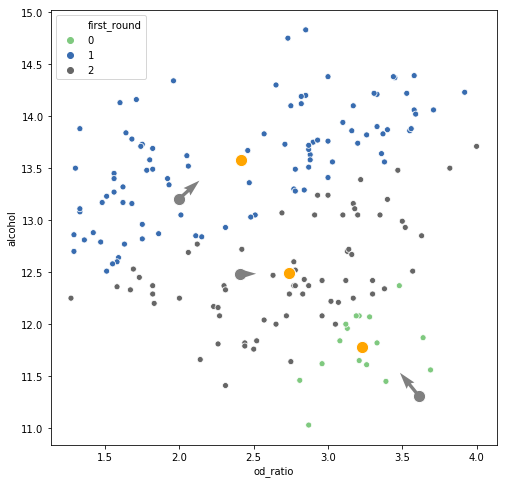

In [10]:
plt.figure(figsize=(8,8))
# Make a scatter plot of the data, coloring by the closest centroid
wine_clusters['first_round'] = closest_centroids
sns.scatterplot(data=wine_clusters, x='od_ratio', y='alcohol', hue='first_round', palette='Accent')

# Now we plot the intial, random centroids
plt.scatter(centroids[:,0], centroids[:,1], color='grey', s=150, edgecolors='w')

# Notice that the effect of the algorithm is to choose incrementally better centroids
plt.scatter(new_centroids[:,0], new_centroids[:,1], color='orange', s=150, edgecolors='w')

# Plot an arrow showing direction it moved. You can see what happened to each of the centroids - 
delta = new_centroids - centroids
plt.quiver(centroids[:,0], centroids[:,1], delta[:,0], delta[:,1], color='grey')


In [11]:
# Repeat - find the closest centroids again!
closest_centroids2 = pairwise_distances_argmin(points, new_centroids)

# Recalculate the new centroids again!
new_centroids2 = []
for i in np.arange(3):
    # get the average of the points that are closest to centroid i
    # mean = average
    # axis=0 means take the average of the columns
    centroid_i = points[closest_centroids2 == i].mean(axis=0)
    new_centroids2.append(centroid_i)
new_centroids2 = np.array(new_centroids2)
print('Previous centroids')
print(new_centroids)
print('New centroids after two rounds')
print(new_centroids2)
print('Difference')
print(new_centroids - new_centroids2)

Previous centroids
[[ 3.228125   11.779375  ]
 [ 2.41617021 13.57914894]
 [ 2.73691176 12.48823529]]
New centroids after two rounds
[[ 3.1456     11.87      ]
 [ 2.52606383 13.62893617]
 [ 2.52186441 12.47864407]]
Difference
[[ 0.082525   -0.090625  ]
 [-0.10989362 -0.04978723]
 [ 0.21504736  0.00959123]]


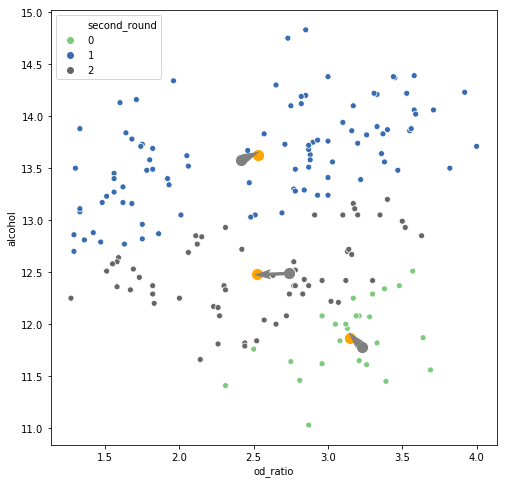

In [12]:
plt.figure(figsize=(8,8))
# Make a scatter plot of the data, coloring by the closest centroid
wine_clusters['second_round'] = closest_centroids2
sns.scatterplot(data=wine_clusters, x='od_ratio', y='alcohol', hue='second_round', palette='Accent')

# Plot the previous centroids
plt.scatter(new_centroids[:,0], new_centroids[:,1], color='grey', s=150, edgecolors='w')

# Notice that the centroids have improved again
plt.scatter(new_centroids2[:,0], new_centroids2[:,1], color='orange', s=150, edgecolors='w')

# Plot an arrow showing direction it moved. You can see what happened to each of the centroids - 
delta = new_centroids2 - new_centroids
plt.quiver(new_centroids[:,0], new_centroids[:,1], delta[:,0], delta[:,1], color='grey')


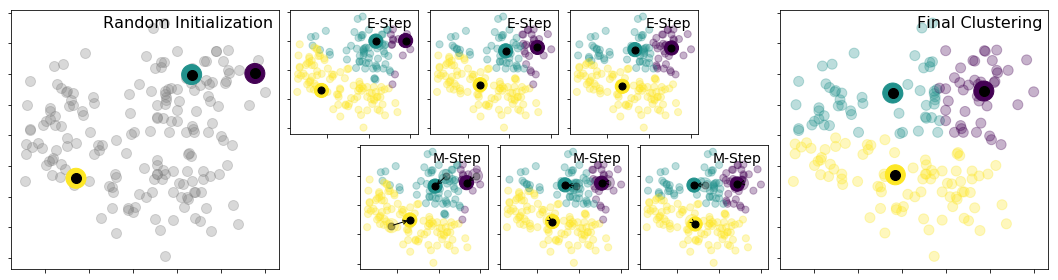

In [13]:
# Produces a nice visualization of our clustering, based on the link below.
# https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
# Will not review this code in class. 
from sklearn.metrics import pairwise_distances_argmin

# Grab the data. 
cols = ['od_ratio', 'alcohol']
X = wine_df[cols].copy().values
y_true = wine_df['class']

# Make random centers as above
rand_od = np.random.uniform(low=1.0, high=4.0, size=3)
rand_alc = np.random.uniform(low=11.0, high=15.0, size=3)
centers = np.vstack([rand_od, rand_alc]).T


def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(3), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(3)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(3):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)
plt.show()